# *Product Purchase Trends Analysis for Regork* 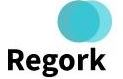

#### **Project Report by:** 
Snehal Sambhaji Lokhande

## **Introduction**

#### Problem

Do we notice a negative trend where total revenue is changing over time for product categories? 

#### Data

We will first determine the customer segments with the most active customer base by slicing the top total sales segments for the age, income, and kids count variables within the transactions and demographics data. Within each demographic, we will analyze revenue as a new variable to measure the trends that a product may have. This is the primary measure that contributes to a company’s performance. We will identify any dips in revenue.

#### Approach/Analytic Technique

We will be following the data set extraction by sorting and then using various vizualization techniques to address the purchasing behavior of a product during the time of the purchase. Here, we will also analyze the sales data to identify valuable business opportunities and improve marketing return on investment for longevity.

We excluded COUPONS/MISC and FUEL from the column variables as we noted it as an outlier, with too much-pooled data that didn't make sense for the marketing campaign.


#### How to Decide

We want to convey it is always challenging to make a decision. However, our project will help to decide on better-targeted marketing campaigns for making a better decision based on considering the most important factors such as Kid's count, Income, Products as per the product category, and Age comprehensively.


## **Packages Required**

In [38]:
import pandas as pd                                 # This helps in analyzing the data
import seaborn as sns                               # This helps in creating statistical inferences and plotting graphs
import matplotlib.pyplot as plt                     # Plotting graph library
from completejourney_py import get_data             #This provides access to data sets
import warnings                                     # To suppress warnings
warnings.filterwarnings('ignore')

### Data Preparation

#### Data Import
Our data sets include the transactions, products, demographic,promotions and campaigns data sets included in the complete journey package. All of the data in complete journey shows retail shopping transactions for 2,469 households over the span of a year. We will read all of this data into Python.

In [3]:
cj_data = get_data()
cj_data.keys()

transactions = cj_data['transactions']

demographics = cj_data['demographics']

products = cj_data['products']


#### Data Cleaning

The first part of data cleaning involves removal of data columns which aren't required from the data sets.To keep the data not messy, we will simplify each data set to only include the variables we want to analyze. 


* **Transactions:**  product_id,quantity,sales_value, transaction_timestamp

In [4]:
transactions_new = transactions[['product_id','quantity','sales_value', 'transaction_timestamp','household_id','store_id']]

* **Products:** product_id,product_type,product_category

In [5]:
products_new = products[['product_id','product_type','product_category']]

* **Demographics:** home_ownership,marital_status,household_size,household_comp

In [6]:
demographics_new = demographics[['household_id','home_ownership','marital_status','age',
                                 'income','household_size','household_comp','kids_count']]

#### Key Variables

We will introduce a new variable called **Revenue** within the transactions data set to help us better understand product trends. 

We also have other existing key variables such as **Kid count,Sales Volume, Product category, Income Range, Transaction_time stamp, week**.

In [7]:
transactions_new['revenue'] = transactions_new['quantity'] * transactions_new['sales_value']
transactions_new

,product_id,quantity,sales_value,transaction_timestamp,household_id,store_id,revenue
0,1095275,1,0.50,2017-01-01 11:53:26,900,330,0.50
1,9878513,1,0.99,2017-01-01 12:10:28,900,330,0.99
2,1041453,1,1.43,2017-01-01 12:26:30,1228,406,1.43
3,1020156,1,1.50,2017-01-01 12:30:27,906,319,1.50
4,1053875,2,2.78,2017-01-01 12:30:27,906,319,5.56
...,...,...,...,...,...,...,...
1469302,14025548,1,0.79,2018-01-01 03:50:03,679,447,0.79
1469303,909894,1,1.73,2018-01-01 04:01:20,2070,311,1.73
1469304,933067,2,5.00,2018-01-01 04:01:20,2070,311,10.00
1469305,1029743,1,2.60,2018-01-01 04:01:20,2070,311,2.60


### **Exploratory Data Analysis**

#### Kids Graph
Here, we have merged the data set and filtered the kids count in the **kid_measure** data set.

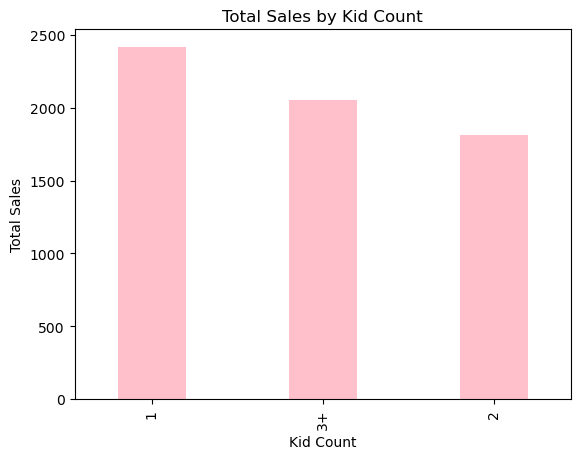

In [8]:
revenue_new= transactions_new.merge(demographics_new,how='inner', on='household_id')

kid_measure = revenue_new.loc[revenue_new['kids_count'] >= '1']

revenue_new_1 = kid_measure.groupby(['sales_value','kids_count'], as_index= False).agg({'sales_value': 'sum'})

revenue_new_1['kids_count'].value_counts().plot(kind='bar' , color='pink' , width = 0.4 , fill='steelblue')
plt.xlabel("Kid Count")
plt.ylabel("Total Sales")
plt.title("Total Sales by Kid Count")
plt.show()


#### Age Graph

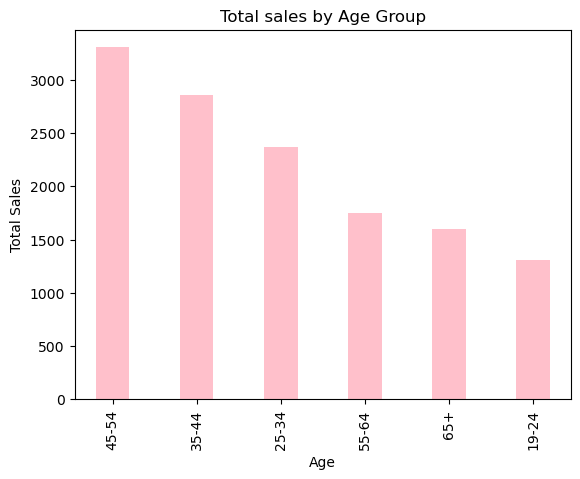

In [9]:
revenue_new = transactions_new.merge(demographics_new,how='inner', on='household_id')

revenue_new_1 = revenue_new.groupby(['sales_value','age'], as_index= False).agg({'sales_value': 'sum'})
revenue_new_1['age'].value_counts().plot(kind='bar' , color='pink' , width = 0.4 , fill='steelblue')
plt.xlabel("Age")
plt.ylabel("Total Sales")
plt.title("Total sales by Age Group")
plt.show()


#### Income Range Graph

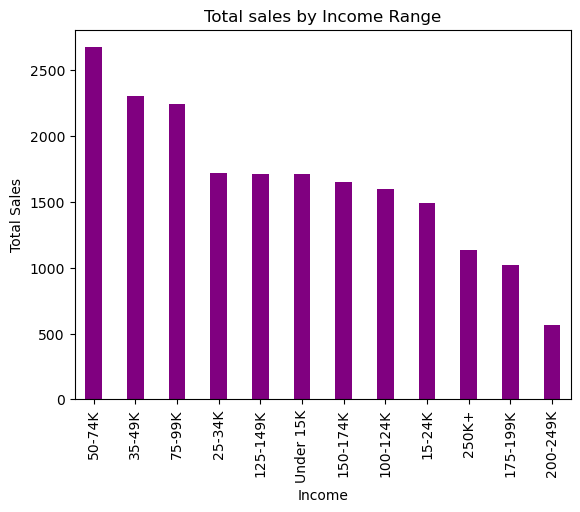

In [11]:
revenue_new = transactions_new.merge(demographics_new,how='inner', on='household_id')
revenue_new_5 = revenue_new.groupby(['sales_value','income'], as_index= False).agg({'sales_value': 'sum'})
revenue_new_5['income'].value_counts().plot(kind='bar' , color='purple' , width = 0.4 , fill='steelblue' )
plt.xlabel("Income")
plt.ylabel("Total Sales")
plt.title("Total sales by Income Range")
plt.show()


#### Age Product Trends

In order to create the age_group_data table, the new revenue table was joined with the adjusted product table, and filtered with data only for age group of **45-54**.

In [13]:
age_group_data = revenue_new.merge(products_new,how='inner', on='product_id').loc[revenue_new['age'] == '45-54']

The age_simplified table removed unnecessary fields from age_group_data. This data was that grouped by product category, and the summarize function was used to yield total revenue. This data frame was then arranged in descending order of total revenue. Also have dropped 'NaN' values from the rows.

In [14]:
age_simplified_1 = age_group_data.groupby('product_category').agg({'revenue' :'sum'}).sort_values(by=['revenue'], ascending=False)
age_simplified_1 = age_simplified_1.dropna()
age_simplified_1

,revenue
product_category,
COUPON/MISC ITEMS,9.410816e+08
SOFT DRINKS,9.920871e+04
FLUID MILK PRODUCTS,4.558600e+04
CHEESE,4.521374e+04
BEEF,4.186489e+04
...,...
QUICK SERVICE,7.790000e+00
PHARMACY,5.890000e+00
BULK FOODS,3.990000e+00


The age_filtered data frame was created out of the age_group_data but filtered based on the top three product categories from the age plot found initially being, **SOFT DRINKS, CHEESE, and FLUID MILK PRODUCTS**.

Soft drinks were the clear top selling product overall by age group.

Since Total Sales declines most steeply and steadily over July through August, we recommend launching aggressive campaign for Soft Drinks during the month of August.  September through November undergoes a decline in sales as well but since not as steep, we can have a less aggressive campaign over those months.

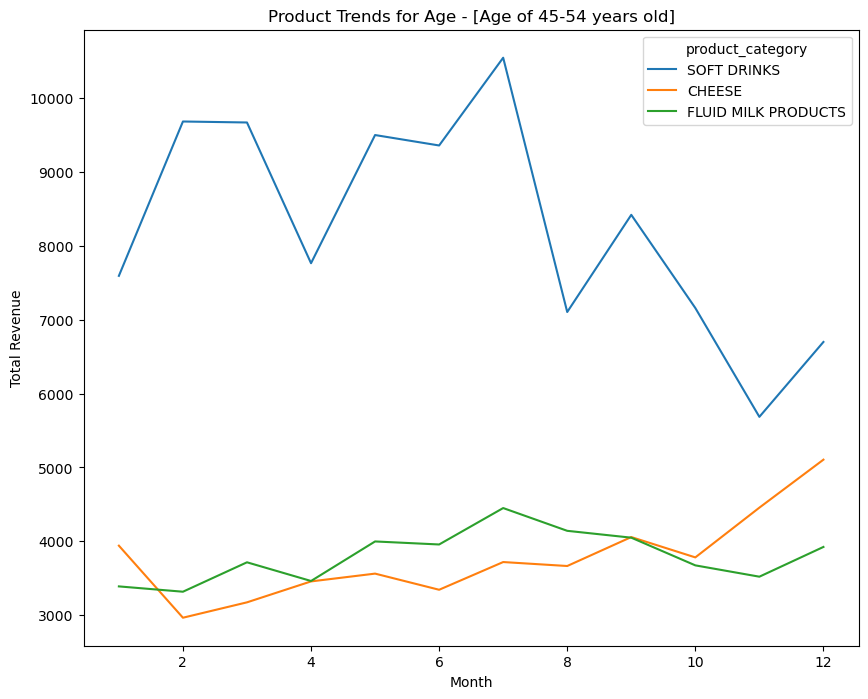

In [35]:
age_group_data['which_month'] = age_group_data['transaction_timestamp'].dt.month_name().str[:3]

age_filtered_1 = age_group_data.loc[(age_group_data['product_category'] == 'SOFT DRINKS') | (age_group_data['product_category'] == 'CHEESE') | 
 (age_group_data['product_category'] == 'FLUID MILK PRODUCTS')].groupby(['which_month','product_category'], as_index=False).agg({"revenue" :"sum"}).sort_values(by=['revenue'], ascending=False)
age_filtered_1
value_mapping = {'Jan': 1,'Feb': 2,'Mar': 3,'Apr': 4,'May': 5,'Jun': 6,'Jul': 7,'Aug': 8,'Sep': 9,'Oct': 10,'Nov': 11,'Dec': 12}
age_filtered_1['which_month']=age_filtered_1['which_month'].replace(value_mapping)

fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=age_filtered_1, x="which_month", y="revenue",hue='product_category',ax=ax)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Product Trends for Age - [Age of 45-54 years old]")
plt.show()

#### Income Products

In order to create the income_group_data table, the new revenue table was joined with the adjusted product table, and filtered with data only for income range  of **Income range 50-74k**.


In [16]:
income_group_data = (revenue_new.merge(products_new,how='inner', on='product_id')).loc[revenue_new['income'] == '50-74K']


The income_simplified table removed unnecessary fields from income_group_data. This data was that grouped by product category, and the summarize function was used to yield total revenue. This data frame was then arranged in descending order of total revenue.

In [17]:
income_simplified_1 = income_group_data.groupby('product_category').agg({'revenue' :'sum'}).sort_values(by=['revenue'], ascending=False)
income_simplified_1 = income_simplified_1.dropna()
income_simplified_1

,revenue
product_category,
COUPON/MISC ITEMS,1.611396e+08
FUEL,9.926278e+05
SOFT DRINKS,5.982149e+04
BEEF,5.431443e+04
FRZN MEAT/MEAT DINNERS,2.264159e+04
...,...
SERVICE BEVERAGE,8.520000e+00
HOME HEALTH CARE,8.040000e+00
NATURAL VITAMINS,5.790000e+00


The income_filtered data frame was created out of the age_group_data but filtered based on the top three product categories from the age plot found initially being, **SOFT DRINKS, BEEF, and FRZN MEAT/MEAT DINNERS**.

For Beef and Soft Drink the top 2 highest revenue producing over the course of a year filtered income of **50-74k**, there is a steady decline over the months of May through November. We propose to have a  marketing campaign to promote beef and soft drink products during this time for income of **50-74k**.


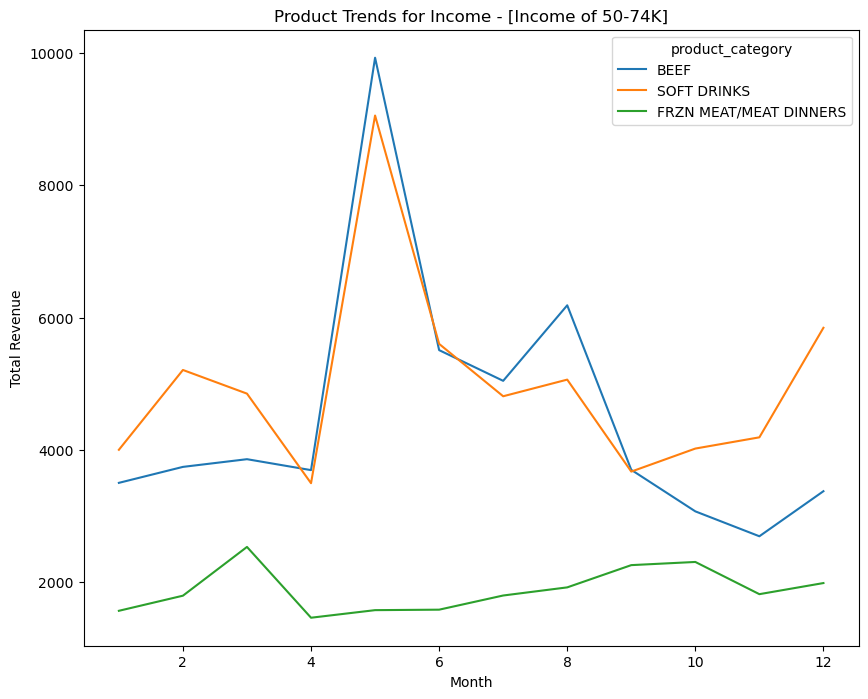

In [36]:
income_group_data['which_month'] = income_group_data['transaction_timestamp'].dt.month_name().str[:3]

income_filtered_1 = income_group_data.loc[(income_group_data['product_category'] == 'SOFT DRINKS') | (income_group_data['product_category'] == 'BEEF') | 
 (income_group_data['product_category'] == 'FRZN MEAT/MEAT DINNERS')].groupby(['which_month','product_category'], as_index=False).agg({"revenue" :"sum"}).sort_values(by=['revenue'], ascending=False)
income_filtered_1
value_mapping = {'Jan': 1,'Feb': 2,'Mar': 3,'Apr': 4,'May': 5,'Jun': 6,'Jul': 7,'Aug': 8,'Sep': 9,'Oct': 10,'Nov': 11,'Dec': 12}
income_filtered_1['which_month']=income_filtered_1['which_month'].replace(value_mapping)
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=income_filtered_1, x="which_month", y="revenue",hue='product_category', ax=ax)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Product Trends for Income - [Income of 50-74K]")

plt.show()


#### Kid Count Products 

In order to create the kid_group_data table, the new revenue table was joined with the adjusted product table, and filtered with data only for kid count of **‘1’**.

In [22]:
kid_group_data = (revenue_new.merge(products_new,how='inner', on='product_id')).loc[revenue_new['kids_count'] == '1']


The kid_simplified table removed unnecessary fields from kid_group_data. This data was that grouped by product category, and the summarize function was used to yield total revenue. This data frame was then arranged in descending order of total revenue.

In [23]:
kid_simplified_1 = kid_group_data.groupby('product_category').agg({'revenue' :'sum'}).sort_values(by=['revenue'], ascending=False)
kid_simplified_1 = kid_simplified_1.dropna()
kid_simplified_1


,revenue
product_category,
COUPON/MISC ITEMS,4.638282e+08
FLUID MILK PRODUCTS,3.141915e+04
BEEF,3.006528e+04
SOFT DRINKS,2.739742e+04
FRZN MEAT/MEAT DINNERS,1.878052e+04
...,...
MEAT SUPPLIES,3.140000e+00
HOME FURNISHINGS,3.000000e+00
CIGARS,2.590000e+00


The kid_filtered data frame was created out of the kid_group_data but filtered based on the top three product categories from the age plot found initially being, **SOFT DRINKS, BEEF, and FLUID MILK PRODUCTS**.There's a steep decline during month of June for top sales Fluid Milk Product, we recommend aggressive market campaign to promote Fluid milk products at June. 

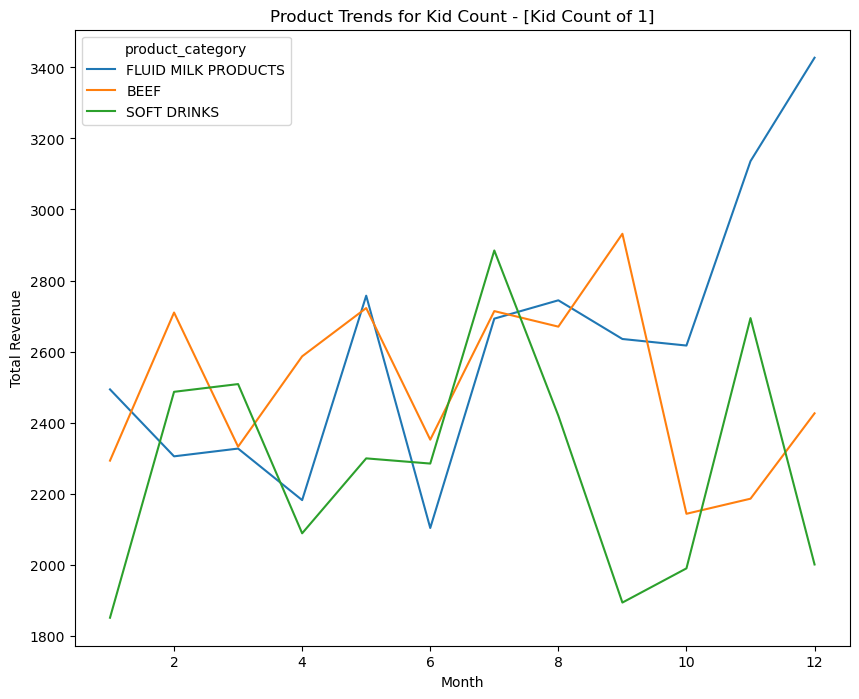

In [37]:
kid_group_data['which_month'] = kid_group_data['transaction_timestamp'].dt.month_name().str[:3]

kid_filtered_1 = kid_group_data.loc[(kid_group_data['product_category'] == 'SOFT DRINKS') | (kid_group_data['product_category'] == 'BEEF') | 
 (kid_group_data['product_category'] == 'FLUID MILK PRODUCTS')].groupby(['which_month','product_category'],as_index=False).agg({"revenue" :"sum"}).sort_values(by=['revenue'], ascending=False)
kid_filtered_1
value_mapping = {'Jan': 1,'Feb': 2,'Mar': 3,'Apr': 4,'May': 5,'Jun': 6,'Jul': 7,'Aug': 8,'Sep': 9,'Oct': 10,'Nov': 11,'Dec': 12}
kid_filtered_1['which_month']=kid_filtered_1['which_month'].replace(value_mapping)
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=kid_filtered_1, x="which_month", y="revenue",hue='product_category',ax=ax)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Product Trends for Kid Count - [Kid Count of 1]")
plt.show()


### **Summary**

Based on our analysis, we discovered some insights and recommend the following marketing campaigns :


* **Age 45-54** : Aggressive campaign for Soft Drinks during the month of July to August. Less Aggressive campaign for Soft Drinks during September to November.

* **Income range 50-74k** : Marketing campaign for beef and soft drink between June-November.

* **Kid Count of 1** : Aggressive Marketing Campaign for Milk at June.

* Additionally, here are some insights that helped us make these conclusions and are valuable takeaways for your company.

* There's a negative trend in **Soft Drinks** purchases for the age group **45-54** year age group between July and Aug.

* Total sales of **Soft drinks** was highest from May to July for the age group 45-54, However there's a steep decrease for the months between September to November.

* The trend also has highest volume of total sales for **Soft drinks** where the Income range is between **50 - 74K**  with a Revenue above 3500.

* Households with **1** kid and a total revenue of above 4000 has a steep increase for the months Oct to Dec and a steep decrease in June.

For further analysis we recommend researching specific products within each category. This can help the advertisements be even more effective by having a smaller target range.
